# Canny for Edge Detection (ROI)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

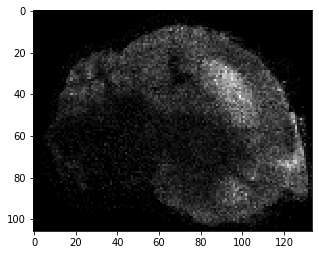

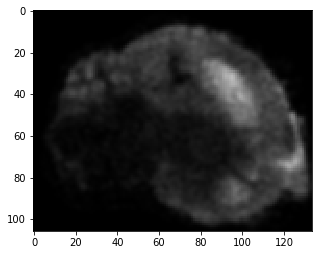

In [98]:
img = cv2.imread("D:/BMR-DS/Project_2/DataSet/brain_100um_mz_peaks/brain_287.png")
#img = cv2.imread("D:/BMR-DS/Project_2/DataSet/DESI Example/DESI Example/A30.jpg")
img = np.array(img)
tmp_img = img
plt.figure(figsize=(5, 5))
plt.imshow(img)
img = cv2.GaussianBlur(img, (5, 5), 0)
plt.figure(figsize=(5, 5))
plt.imshow(img)

## How to determine the threshold?
1. First, for different types of tissues, the threshold selection is different or fixed?

2. Some thresholds have been proved useful for low resolution images?

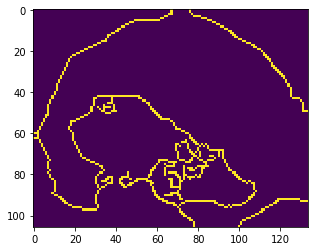

In [75]:
# threshold2 is used to detect distinct edge
# threshold1 is used to connect the intermittent edges
edge = cv2.Canny(img, 5, 300)
edge = np.array(edge)
plt.imshow(edge)

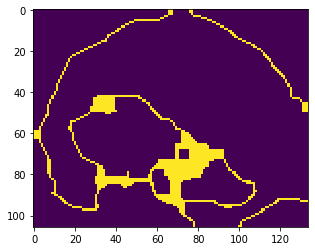

In [76]:
kernel = np.ones((5,5))
dilate = cv2.dilate(edge, kernel, iterations = 1)
erosion = cv2.erode(dilate, kernel, iterations = 1)
plt.imshow(np.array(erosion))

# ROI selection via OpenCV

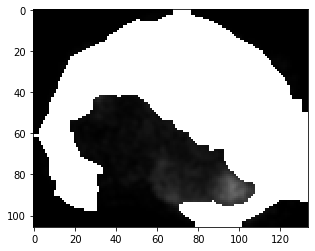

In [87]:
img1, contours, hierarchy=cv2.findContours(erosion,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
zero_img = np.zeros(img.shape)
#plt.imshow(zero_img)
image = cv2.drawContours(img, contours, 0, (255, 255, 255), -1)

plt.imshow(np.array(img))

Text(0.5, 1.0, 'ROI Image')

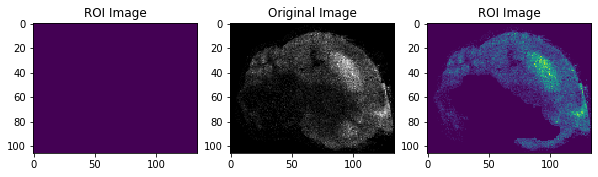

In [96]:
#image = cv2.bitwise_and(img, image)
#image = cv2.add(img, image)
plt.figure(figsize=(10, 8))

res_img = np.zeros((img.shape[0], img.shape[1]))
plt.subplot(131)
plt.imshow(res_img)
plt.title("ROI Image")

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j][1] == 255:
            #res_img[i][j][0] = tmp_img[i][j][0]
            #res_img[i][j][1] = tmp_img[i][j][0]
            #res_img[i][j][2] = tmp_img[i][j][0]
            res_img[i][j] = tmp_img[i][j][0]
plt.subplot(132)
plt.imshow(tmp_img)
plt.title("Original Image")

plt.subplot(133)
plt.imshow(res_img)
plt.title("ROI Image")

## Combine together!

Text(0.5, 1.0, 'ROI Image')

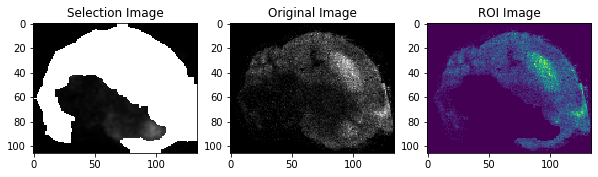

In [102]:
img = cv2.imread("D:/BMR-DS/Project_2/DataSet/brain_100um_mz_peaks/brain_287.png")
#img = cv2.imread("D:/BMR-DS/Project_2/DataSet/DESI Example/DESI Example/A30.jpg")
img = np.array(img)
tmp_img = img
img = cv2.GaussianBlur(img, (5, 5), 0)
kernel = np.ones((5,5))

iterations = 10
for i in range(iterations):
    edge = cv2.Canny(img, 5, 300)
    edge = np.array(edge)   
    dilate = cv2.dilate(edge, kernel, iterations = 1)
    erosion = cv2.erode(dilate, kernel, iterations = 1)

    img1, contours, hierarchy=cv2.findContours(erosion,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
    image = cv2.drawContours(img, contours, 0, (255, 255, 255), -1)

plt.figure(figsize=(10, 8))

plt.subplot(131)
plt.imshow(img)
plt.title("Selection Image")
res_img = np.zeros((img.shape[0], img.shape[1]))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j][1] == 255:
            #res_img[i][j][0] = tmp_img[i][j][0]
            #res_img[i][j][1] = tmp_img[i][j][0]
            #res_img[i][j][2] = tmp_img[i][j][0]
            res_img[i][j] = tmp_img[i][j][0]
plt.subplot(132)
plt.imshow(tmp_img)
plt.title("Original Image")

plt.subplot(133)
plt.imshow(res_img)
plt.title("ROI Image")